# Car Accident Case Study

Data is from 3.5M car accidents in the US between Feb 2016 - June 2020


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
!pip install pandas

In [75]:
accident_data = pd.read_csv('../project/files/US_Accidents_June20.csv')
accident_data.head(10)
    
    

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
accident_data.shape

(3513617, 49)

Configuring time data

In [76]:

accident_data["Start_Time"]= pd.to_datetime(accident_data["Start_Time"]) 
accident_data["End_Time"]= pd.to_datetime(accident_data["End_Time"])
accident_data["Weather_Timestamp"]= pd.to_datetime(accident_data["Weather_Timestamp"])

Configuring weekday data

In [78]:

accident_data['Year']=accident_data['Start_Time'].dt.year
accident_data['Month']=accident_data['Start_Time'].dt.month
accident_data['Day']=accident_data['Start_Time'].dt.day
accident_data['Hour']=accident_data['Start_Time'].dt.hour
accident_data['Minute']=accident_data['Start_Time'].dt.minute
accident_data['Weekday']=accident_data['Start_Time'].dt.weekday

def weekday_text(w):
    d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    return d[w]
accident_data['Weekday']=accident_data['Weekday'].apply(lambda x:weekday_text(x))

Which day did the most accidents occur on? Friday The least accidents happen on Sunday.

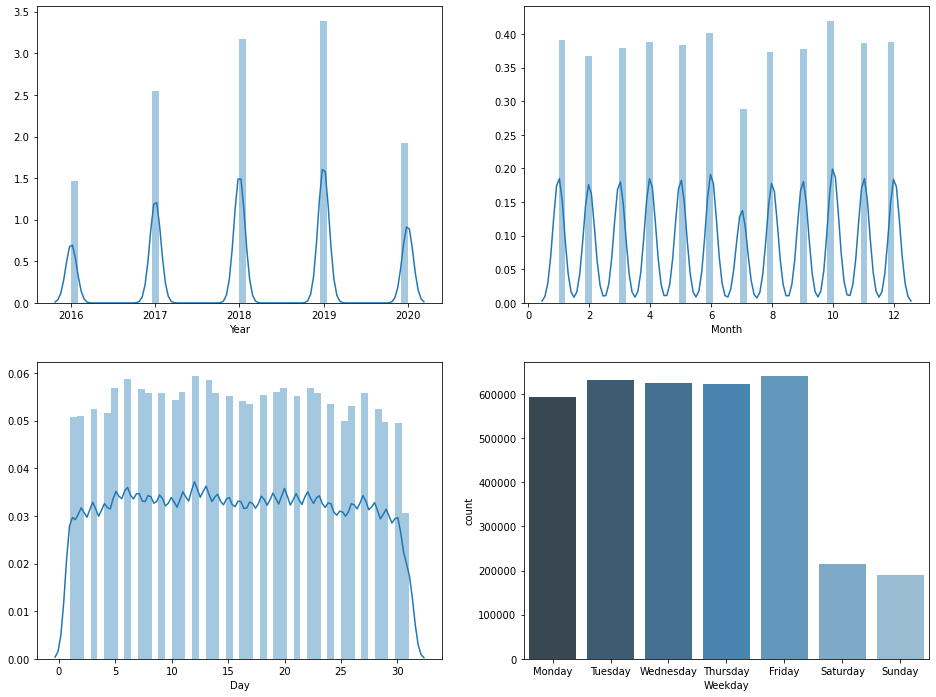

In [27]:
f, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.distplot(accident_data['Year'], ax=axes[0, 0])

sns.distplot(accident_data['Month'], ax=axes[0, 1])


sns.distplot(accident_data['Day'], ax=axes[1, 0])
sns.countplot(accident_data['Weekday'], palette='Blues_d',ax=axes[1, 1])

In what state did the most car accidents happen? California leads at 816,825

ERROR! Session/line number was not unique in database. History logging moved to new session 36


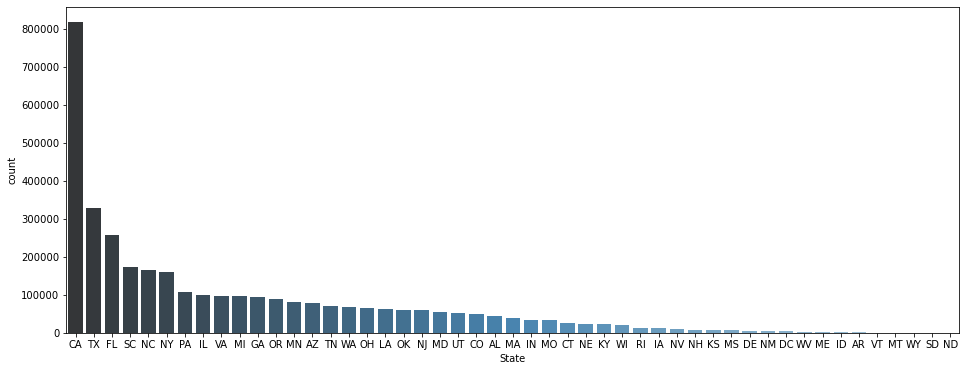

In [31]:

fig = plt.figure(figsize = (16, 6))
sns.countplot(x='State', data=accident_data, order=accident_data['State'].value_counts().index, palette='Blues_d')
plt.show()





How many car accidents were in the state of Illinois? 99,692

In [7]:
state_data = accident_data['State']
state_data 
print(accident_data.groupby(by='State').size())

State
AL     44625
AR      2012
AZ     78584
CA    816825
CO     49731
CT     25901
DC      4820
DE      5739
FL    258002
GA     93614
IA     11475
ID      2044
IL     99692
IN     33746
KS      7939
KY     22553
LA     61515
MA     39044
MD     53593
ME      2243
MI     95983
MN     81863
MO     33643
MS      6585
MT       512
NC    165958
ND        44
NE     23970
NH      7984
NJ     59059
NM      5523
NV     10643
NY    160817
OH     66139
OK     60003
OR     90122
PA    106787
RI     11753
SC    173277
SD        61
TN     69895
TX    329284
UT     51685
VA     96075
VT       702
WA     68544
WI     20120
WV      2381
WY       508
dtype: int64


States CA, TX, FL, SC, NC had the most car accidents. Why?

What is the most common severity of car accidents?  In this dataset, severity is how long traffic is delayed by the accident. Most accidents were at severity 2 at 2,373,210

In [34]:

print(accident_data.groupby(by='Severity').size())

ERROR! Session/line number was not unique in database. History logging moved to new session 37
Severity
1      29174
2    2373210
3     998913
4     112320
dtype: int64


Average weather conditions


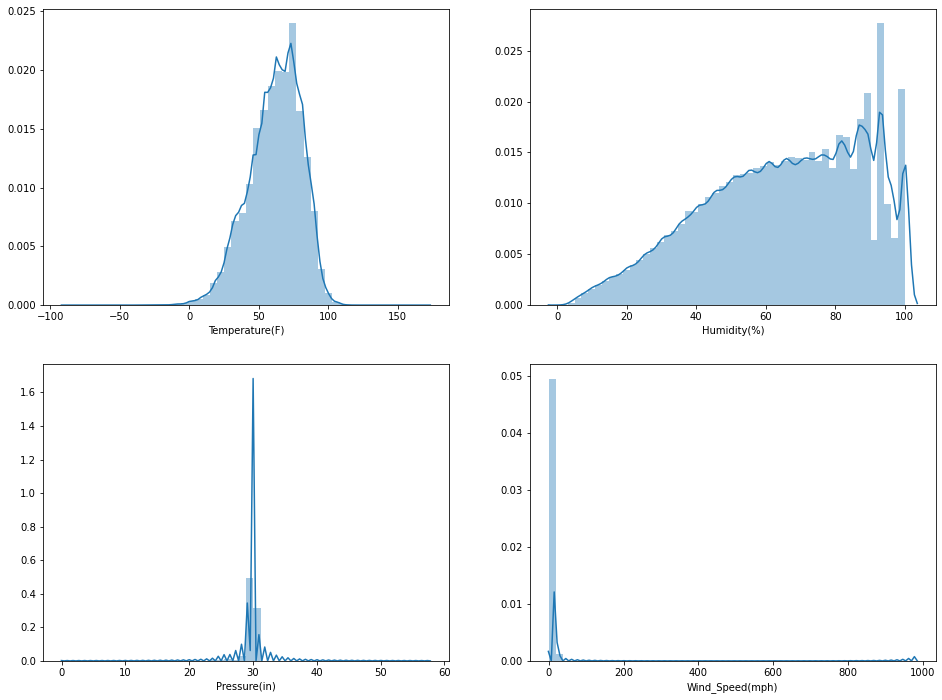

In [36]:
f, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.distplot(accident_data['Temperature(F)'], ax=axes[0, 0])
sns.distplot(accident_data['Humidity(%)'], ax=axes[0, 1])
sns.distplot(accident_data['Pressure(in)'], ax=axes[1, 0])
sns.distplot(accident_data['Wind_Speed(mph)'], ax=axes[1, 1])


In [31]:
weather_data = accident_data['Weather_Condition']
weather_data 
print(accident_data.groupby(by='Weather_Condition').size())

Weather_Condition
Blowing Dust                 73
Blowing Dust / Windy        117
Blowing Sand                  1
Blowing Snow                337
Blowing Snow / Windy         62
                           ... 
Volcanic Ash                 22
Widespread Dust             148
Widespread Dust / Windy       1
Wintry Mix                 1681
Wintry Mix / Windy           40
Length: 127, dtype: int64


In [57]:
print(accident_data.groupby(by='Sunrise_Sunset').size())

Sunrise_Sunset
Day      2593757
Night     919745
dtype: int64


In [58]:
print(accident_data.groupby(by='Year').size())

Year
2016    410593
2017    717489
2018    892615
2019    953733
2020    539187
dtype: int64
